In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

In [45]:
# Distribution graphs (histogram/bar graph) of column data
# def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
#     nunique = df.nunique()
#     df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
#     nRow, nCol = df.shape
#     columnNames = list(df)
#     nGraphRow = math.ceil(nCol + nGraphPerRow - 1) / nGraphPerRow
#     plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
#     for i in range(min(nCol, nGraphShown)):
#         plt.subplot(nGraphRow, nGraphPerRow, i + 1)
#         columnDf = df.iloc[:, i]
#         if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
#             valueCounts = columnDf.value_counts()
#             valueCounts.plot.bar()
#         else:
#             columnDf.hist()
#         plt.ylabel('counts')
#         plt.xticks(rotation = 90)
#         plt.title(f'{columnNames[i]} (column {i})')
#     plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
#     plt.show()

In [46]:
# Function to plot the distribution of each column
def plot_per_column_distribution(df, nrows, ncols):
    """
    Plots the distribution of each column in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    nrows (int): Number of rows in the subplot grid.
    ncols (int): Number of columns in the subplot grid.
    """
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15)) # figsize is in inches
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, col in enumerate(df.columns):
        if i < len(axes):  # Ensure we don't exceed the number of subplots
            df[col].plot(kind='hist', ax=axes[i], title=col, bins=10) # bins = 20 means 20 bars
            axes[i].set_xlabel(col)
        else:
            break
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

In [47]:
# Correlation matrix
# def plotCorrelationMatrix(df, graphWidth):
#     filename = df.dataframeName
#     df = df.dropna('columns') # drop columns with NaN
#     df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
#     if df.shape[1] < 2:
#         print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
#         return
#     corr = df.corr()
#     plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
#     corrMat = plt.matshow(corr, fignum = 1)
#     plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
#     plt.yticks(range(len(corr.columns)), corr.columns)
#     plt.gca().xaxis.tick_bottom()
#     plt.colorbar(corrMat)
#     plt.title(f'Correlation Matrix for {filename}', fontsize=15)
#     plt.show()

In [48]:
# Function to plot the correlation matrix
def plotCorrelationMatrix(df, graphWidth=10):
    """
    Plots the correlation matrix for a given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    graphWidth (int): The width of the graph.
    """
    # Drop columns with NaN values
    df = df.dropna(axis=1)  # axis=1 means drop columns with NaN values

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Check if there are enough columns to plot
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Compute the correlation matrix
    corr = df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=0)  # Use fignum=0 to avoid conflicts
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

In [49]:
# Scatter and density plots
# def plotScatterMatrix(df, plotSize, textSize):
#     df = df.select_dtypes(include =[np.number]) # keep only numerical columns
#     # Remove rows and columns that would lead to df being singular
#     df = df.dropna('columns')
#     df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
#     columnNames = list(df)
#     if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
#         columnNames = columnNames[:10]
#     df = df[columnNames]
#     ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
#     corrs = df.corr().values
#     for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
#         ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
#     plt.suptitle('Scatter and Density Plot')
#     plt.show()

In [50]:
# Function to plot scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    """
    Plots a scatter matrix with density plots on the diagonal and correlation coefficients in the upper triangle.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    plotSize (int): The size of the scatter matrix plot.
    textSize (int): The font size for correlation coefficient annotations.
    """
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Limit the number of columns to 10 for better visualization
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]

    # Create the scatter matrix
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')

    # Calculate correlation coefficients
    corrs = df.corr().values

    # Annotate the upper triangle with correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.5, 0.5), 
                          xycoords='axes fraction', ha='center', va='center', size=textSize)

    # Add a title and show the plot
    plt.suptitle('Scatter and Density Plot', size=15)
    plt.show()

In [51]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('coal_dust.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 300 rows and 8 columns


In [52]:
df1.head(5)

,Elapsed Time [s],PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3],Alarms,Errors
0,1,0.049,0.053,0.079,0.312,0.436,NaN,NaN
1,2,0.042,0.048,0.075,0.322,0.450,NaN,NaN
2,3,0.044,0.052,0.092,0.449,0.592,NaN,NaN
3,4,0.014,0.018,0.034,0.191,0.240,NaN,NaN
4,5,0.019,0.020,0.022,0.035,0.035,NaN,NaN


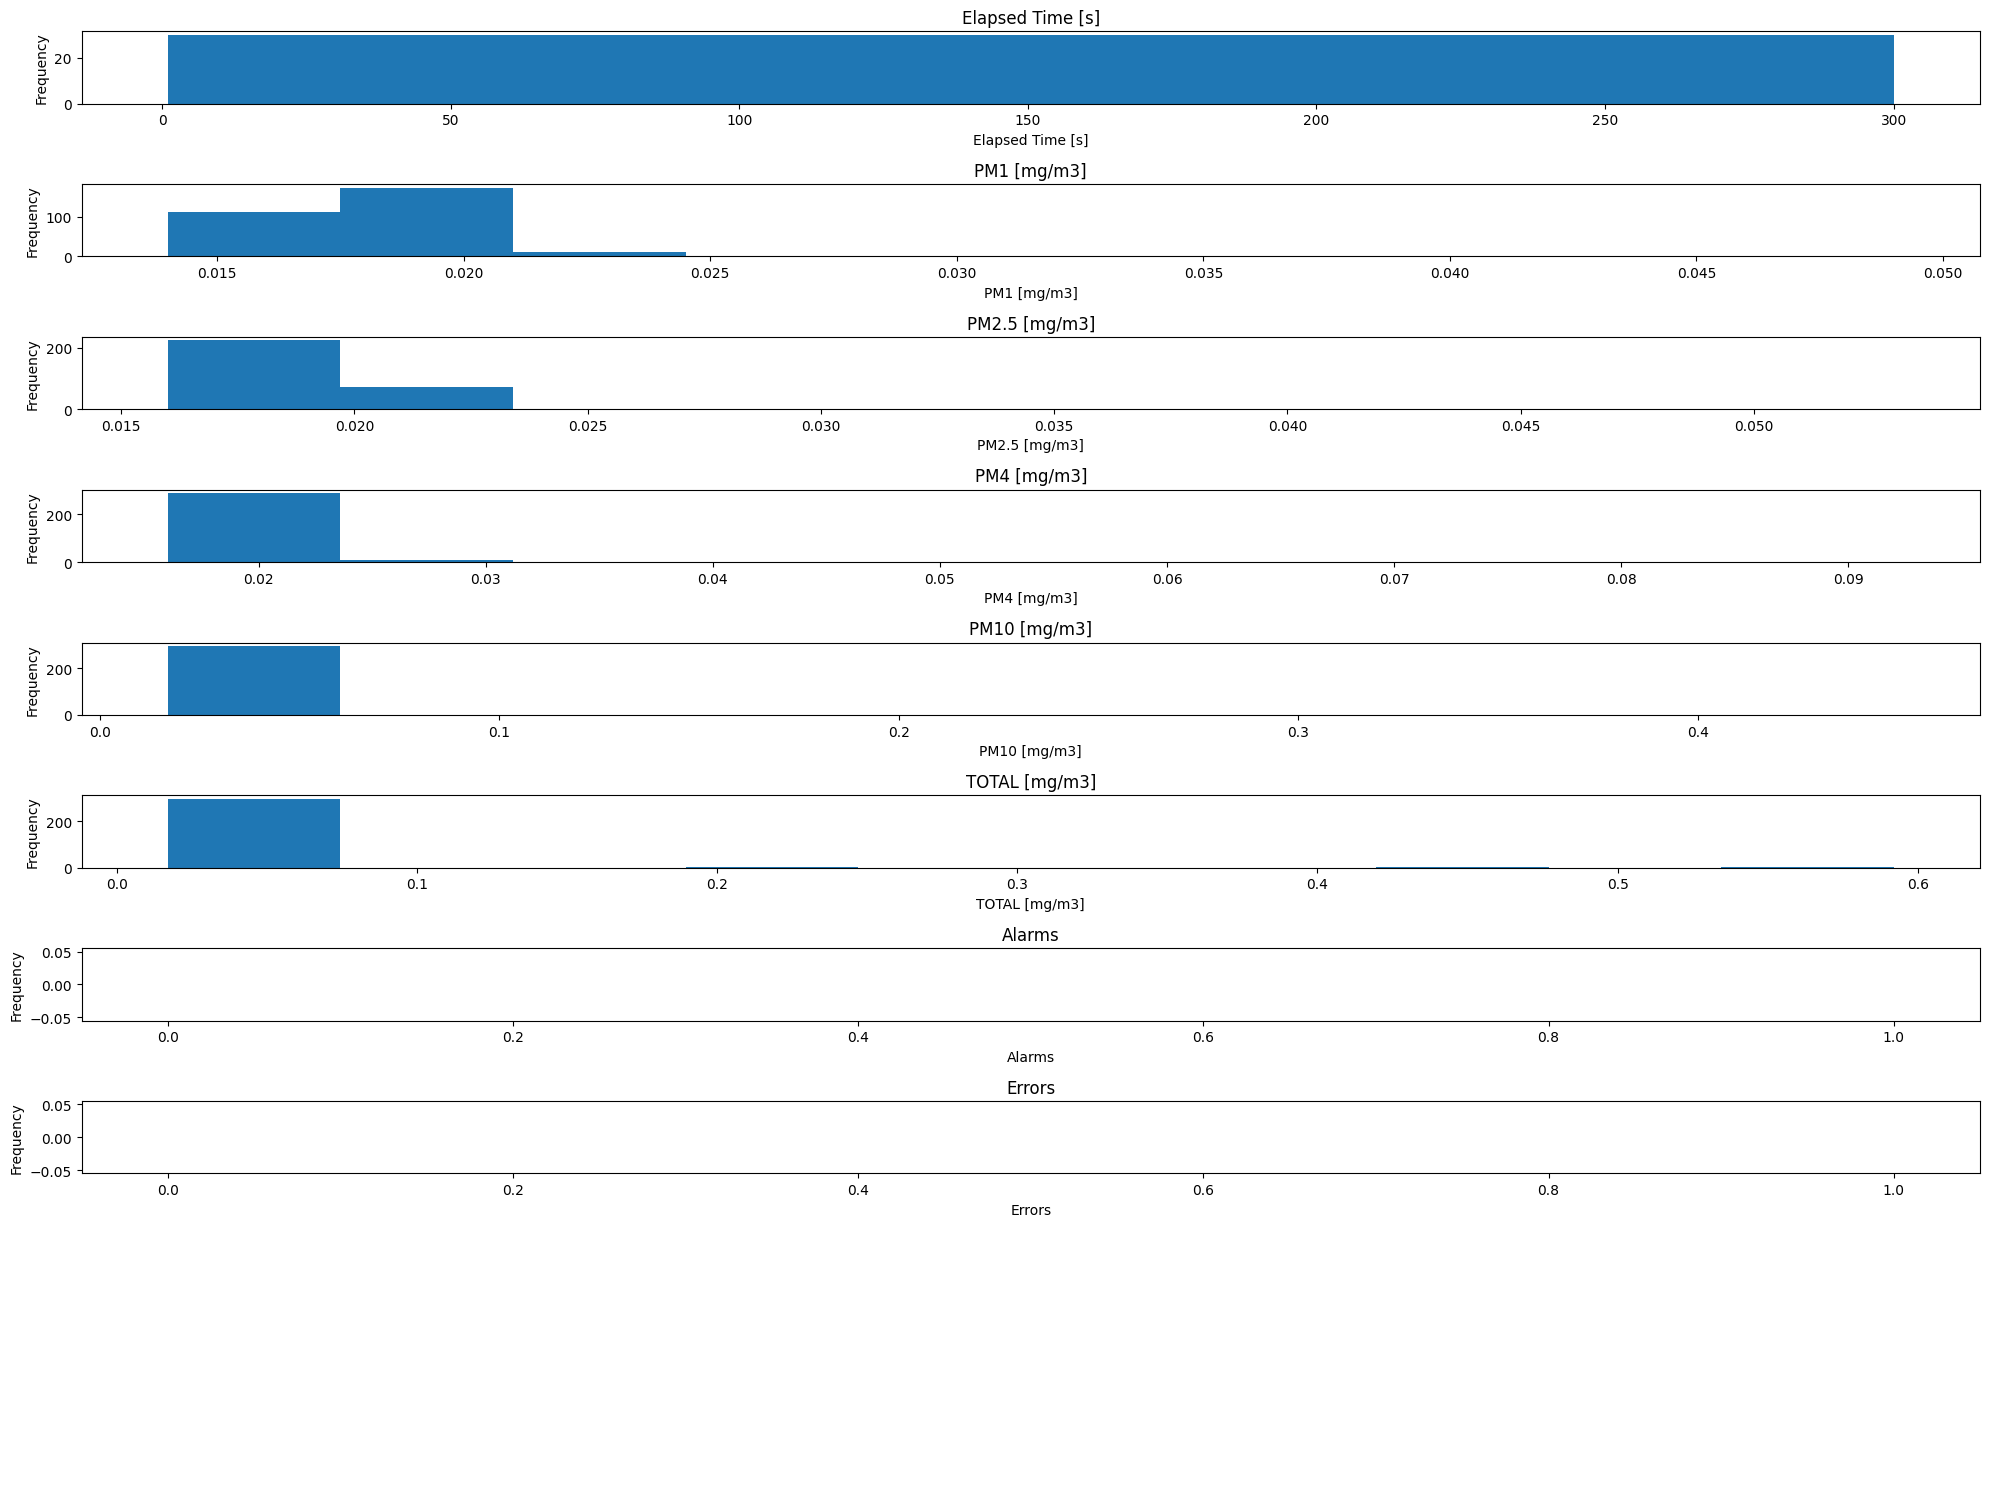

In [53]:
plot_per_column_distribution(df1, 10, 1)

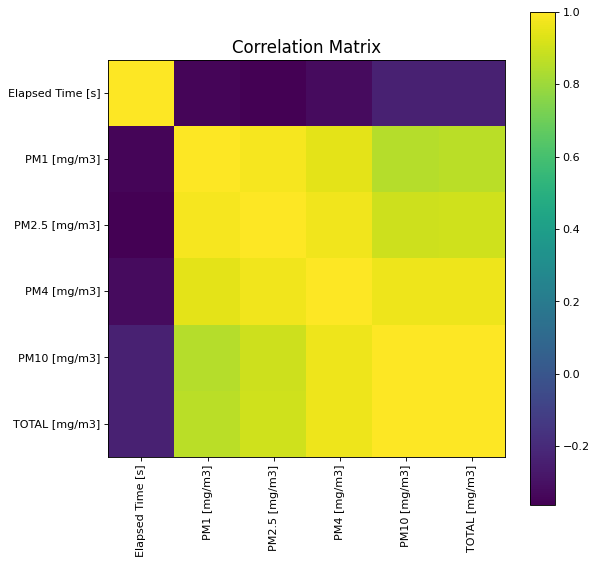

In [54]:
plotCorrelationMatrix(df1, 8)

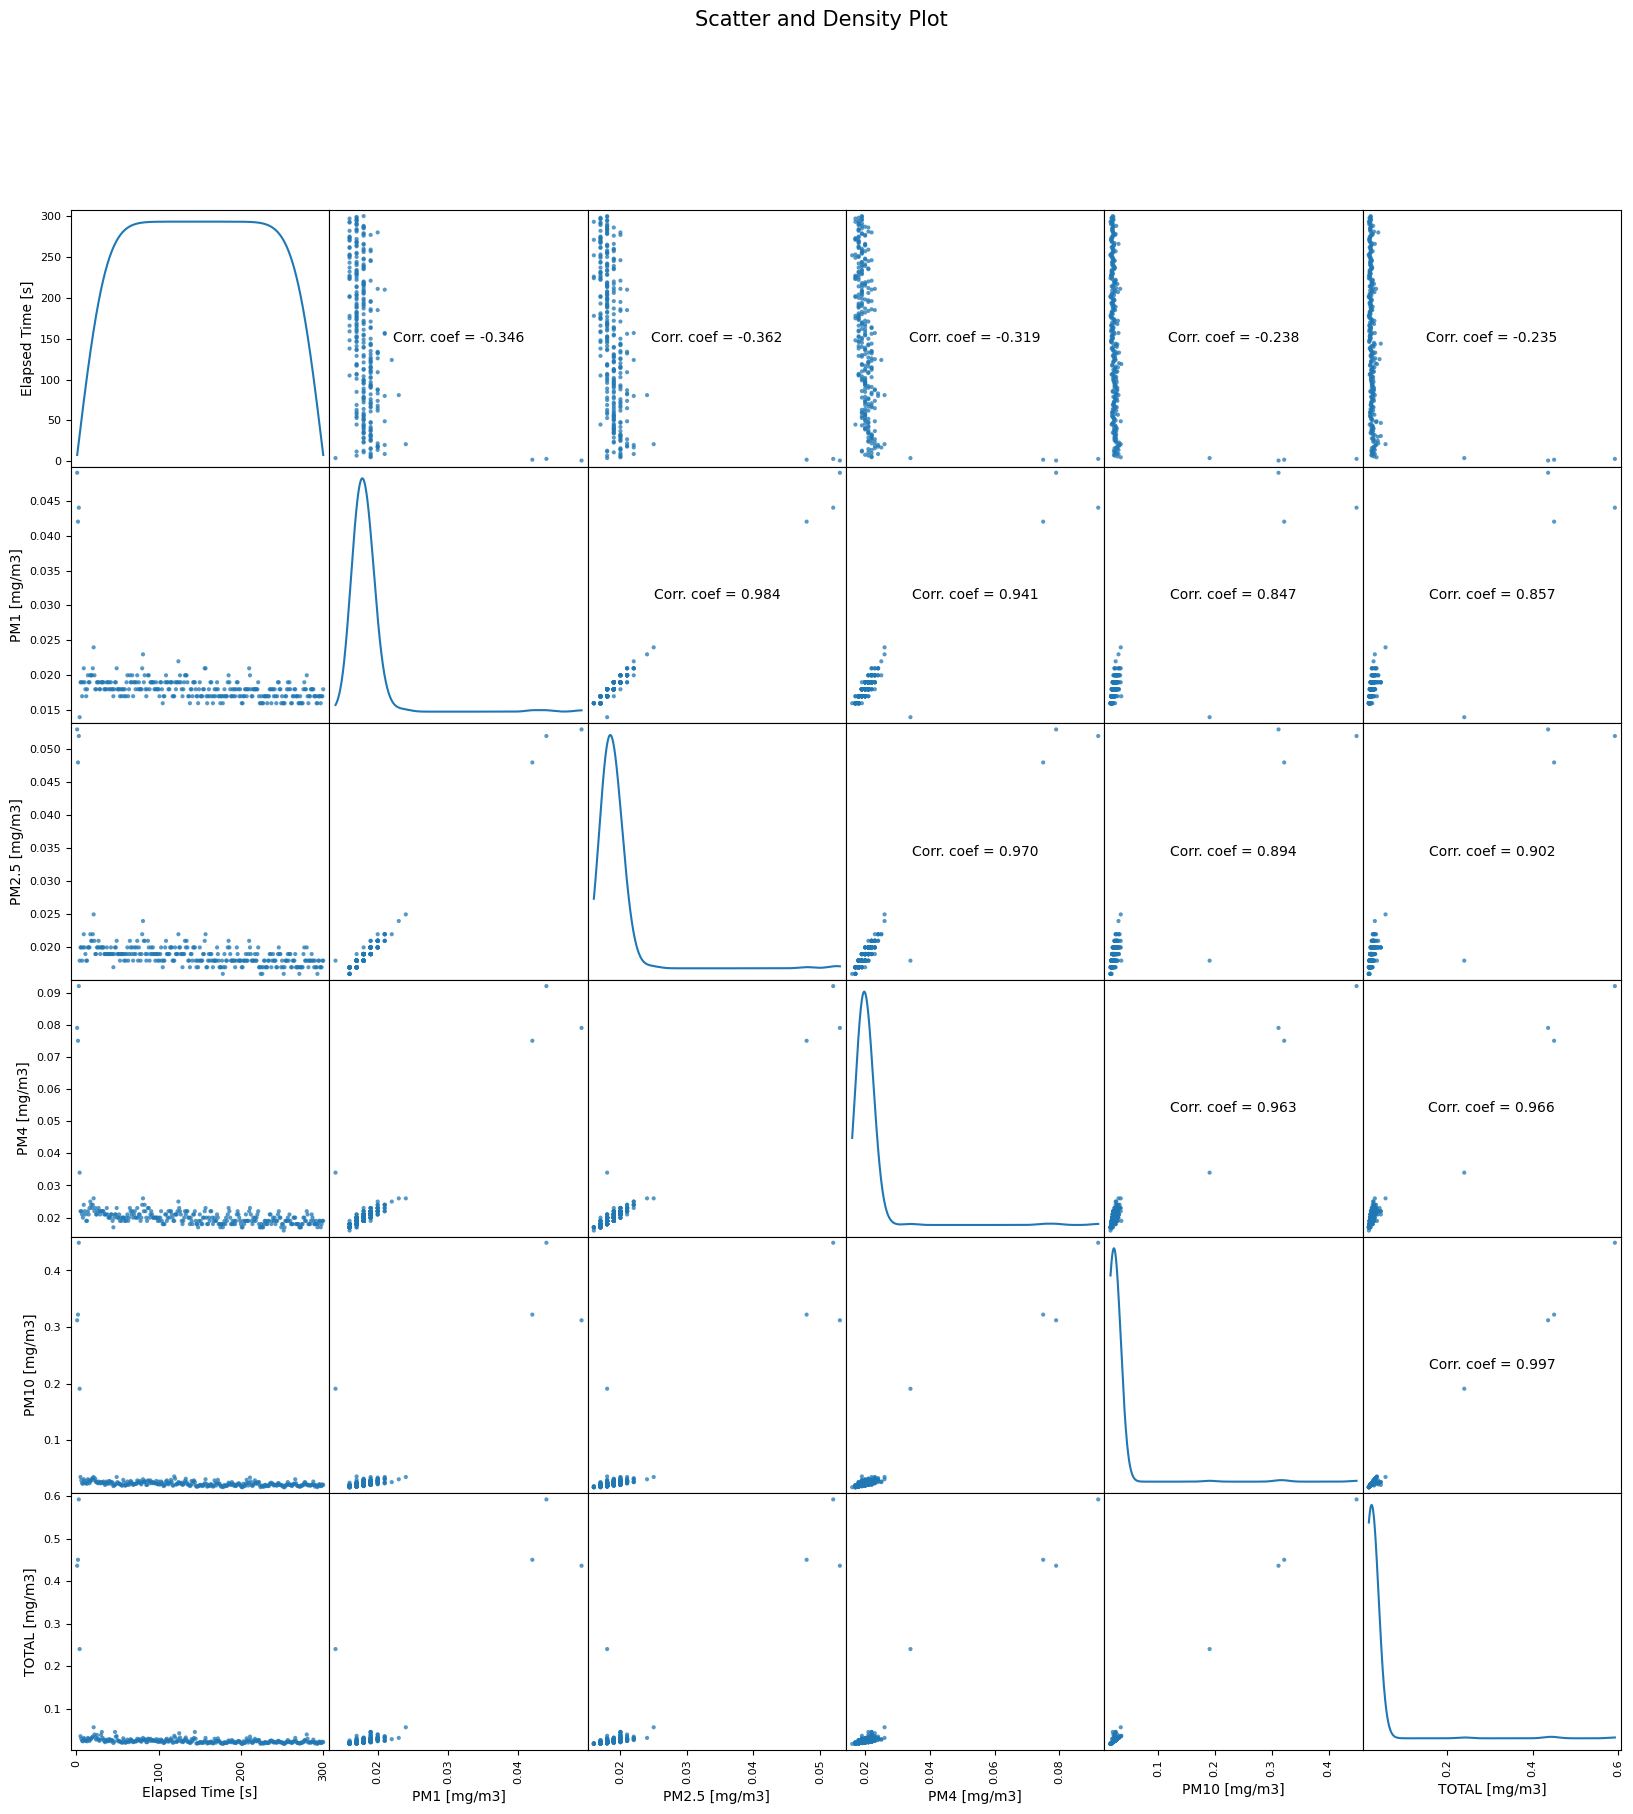

In [55]:
plotScatterMatrix(df1, 20, 10)